In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [25]:
df = pd.read_csv(r"C:\Users\rjey0\Downloads\practise\dbscan\wine_clustering_data.csv")
print(df.head())


   alcohol  malic_acid   ash  ash_alcanity  magnesium  total_phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280  proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [26]:
X = df.iloc[:, [0, 1]].values


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)


In [29]:
df['Cluster'] = labels
print(df['Cluster'].value_counts())


Cluster
 0    156
-1     11
 1      6
 2      5
Name: count, dtype: int64


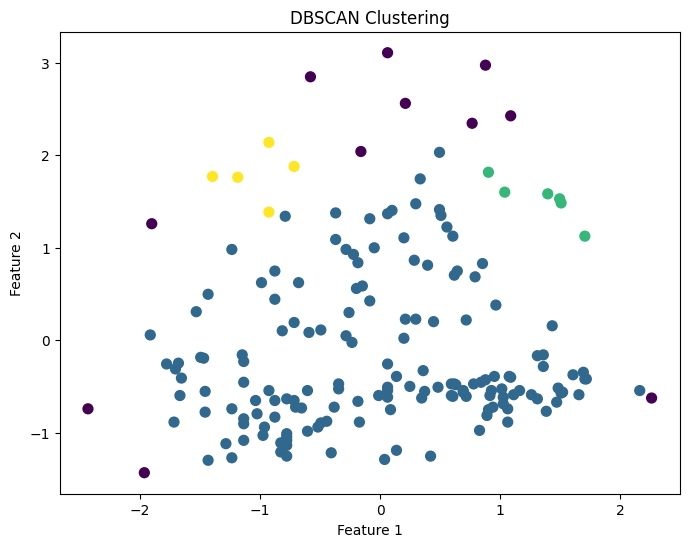

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [31]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)


Number of clusters: 3


In [32]:
print(df['Cluster'].value_counts())


Cluster
 0    156
-1     11
 1      6
 2      5
Name: count, dtype: int64


In [33]:
import pickle
df['Cluster'] = labels

# Save scaler & model
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("dbscan_model.pkl", "wb") as f:
    pickle.dump(dbscan, f)

print("Scaler and DBSCAN model saved successfully")


Scaler and DBSCAN model saved successfully


In [34]:
import pickle
import numpy as np

# Load saved objects
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("dbscan_model.pkl", "rb") as f:
    dbscan = pickle.load(f)

# New input data (example)
new_data = np.array([
    [13.5, 2.3],
    [12.1, 1.8]
])

# Scale new data
new_data_scaled = scaler.transform(new_data)

# DBSCAN clustering
new_labels = dbscan.fit_predict(new_data_scaled)

print("Predicted clusters:", new_labels)


Predicted clusters: [-1 -1]
